In [ ]:
# Uncomment if running from Google Colab
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
%cd gdrive/MyDrive/Masters_Project
%pip install -e peratouch

In [1]:
from peratouch.routines import run_network
from peratouch.data import load_data
from peratouch.config import path_five_users_main, path_five_users_first



-- New Fold --
Train, test and validation arrays normalized to:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], [1.0005 1.001  1.0031 0.9993 0.9973 1.0011 1.0009 1.0014 1.0014 1.0012], [1.0005 1.002  1.0016 0.9978 0.9971 0.9997 1.     0.9991 0.9949 1.0005]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (10639, 10, 32) 
Labels shape:  (10639,) 
Shape of test set: (1064, 10, 32) 
Shape of train set: (9270, 10, 32) 
Shape of validation set: (1437, 10, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.22, 0.18, 0.2, 0.22, 0.17] 
Fraction of validation labels:  [0.22, 0.19, 0.21, 0.22, 0.16] 
Fraction of train labels:  [0.2, 0.2, 0.2, 0.2, 0.2] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=0.946, loss_val=0.966, train=62.8%, val=61.3%
End of epoch 11: loss_tr=0.538, loss_val=0.606, train=79.2%, val=77.3%
End of epoch 21: loss_tr=0.468, loss_val=0.605, train=81.6%, val=77.1%
End of epoch 31: loss_tr=0.428, loss_val=0.608, train=83.5%, val=

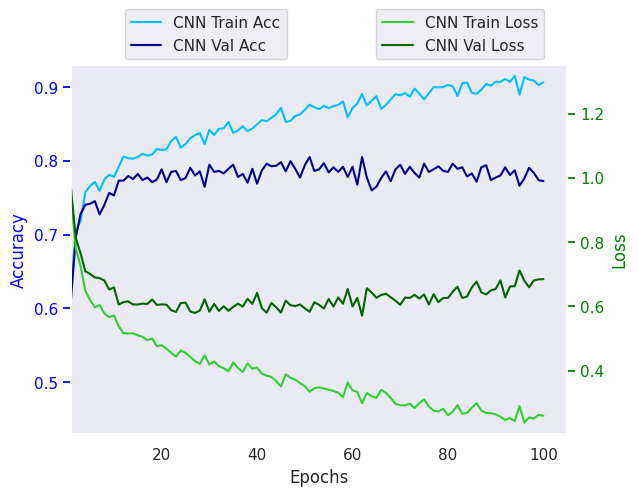

In [2]:
from peratouch.networks import CNN
Xraw, yraw = load_data(path_five_users_main)
_ = run_network(CNN, Xraw, yraw, n_ch=10, n_epochs=100, n_folds=10, n_runs=1, plots=False, n_batches=15, random_resampling=False)

In [4]:
from peratouch.networks import LSTM 
Xraw, yraw = load_data(path_five_users_main)
_ = run_network(LSTM, Xraw, yraw, input_size=16, hidden_size=16, n_ch=1, n_epochs=100, n_folds=10, n_runs=1, plots=False, n_batches=15, random_resampling=False)



-- New Fold --
Train, test and validation arrays normalized to:
[1.], [0.9994], [0.9998]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (10643, 2, 16) 
Shape of train set: (91375, 2, 16) 
Shape of validation set: (14368, 2, 16) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.22, 0.2, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.2, 0.2, 0.2, 0.2, 0.2] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.499, loss_val=1.491, train=39.7%, val=42.3%
End of epoch 11: loss_tr=1.224, loss_val=1.208, train=47.7%, val=48.8%
End of epoch 21: loss_tr=1.129, loss_val=1.117, train=53.5%, val=54.6%
End of epoch 31: loss_tr=1.198, loss_val=1.181, train=48.0%, val=49.1%
End of epoch 41: loss_tr=1.087, loss_val=1.085, train=55.2%, val=55.8%
End of epoch 51: loss_tr=1.075, loss_val=1.077, train=56.2%, val=56.1%
End 

In [ ]:
from peratouch.networks import CNN_LSTM 
Xraw, yraw = load_data(path_five_users_main)
_ = run_network(CNN_LSTM, Xraw, yraw, n_ch=1, n_epochs=100, n_folds=10, n_runs=10, plots=False, n_batches=15, random_resampling=False)

In [ ]:
# # Ran this routine only once for a simple comparison
# ## Run comparison of input sizes of LSTM
# from peratouch.config import path_analysis_results
# from datetime import date
# from peratouch.networks import LSTM 
# import numpy as np

# Xraw, yraw = load_data(path_five_users_main)

# input_sizes = [1, 2, 4, 8, 16, 32]
# results = {}
# for in_size in input_sizes:
#     print('----- input size = ', in_size, "\n")
#     results[str(in_size)] = run_network(LSTM, Xraw, yraw, input_size=in_size, hidden_size=16, n_ch=1, n_epochs=50, n_folds=5, n_runs=5, plots=False, n_batches=15, random_resampling=False)

# save_path = str(path_analysis_results/f'input_size_lstm_{date.today()}.npz')
# np.savez(save_path, **results)

# data = np.load(save_path)
# x = [int(k) for k in data]
# y = [np.mean(vals==preds) for (vals, preds) in data.values()]
# import matplotlib.pyplot as plt 
# plt.plot(x, y)